In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import os

In [ ]:
# load your google drive
from google.colab import drive
drive.mount('/content/drive')

#change directory
%cd /content/drive/MyDrive/Colab Notebooks/Honeypot_analysis

Mounted at /content/drive


In [ ]:
# find data file
fname = "packets-pseudoanonymous.csv"
stream = os.popen("find . -name '%s'" % fname)
fpath = stream.read()[:-1]

In [ ]:
# print data's shape 
data = pd.read_csv(fpath)
print(data.shape)

(75197, 9)


In [ ]:
#show df
#display(HTML(data.to_html()))

In [ ]:
print(data)

                 ts  src_ip src_port  dst_ip  ... proto  pck_len  tcp_flags mirai
0      1.615343e+09     614    51573    5259  ...     6       60          2     0
1      1.615343e+09     614    51573    5260  ...     6       60          2     0
2      1.615343e+09    2915    41619    5250  ...     6       60          2     0
3      1.615343e+09    1675    59731    5207  ...     6       60          2     0
4      1.615343e+09    4665    34377    5345  ...     6       60          2     1
...             ...     ...      ...     ...  ...   ...      ...        ...   ...
75192  1.615347e+09    1804    44345    5148  ...     6       60          2     0
75193  1.615347e+09    3489    52426    5249  ...     6       60          2     0
75194  1.615347e+09     632    54903    5166  ...     6       60          2     0
75195  1.615347e+09     632    54903    5241  ...     6       60          2     0
75196  1.615347e+09     614    51573    5159  ...     6       60          2     0

[75197 rows x 9

In [ ]:
#print data types
print(data.dtypes)

ts           float64
src_ip         int64
src_port      object
dst_ip         int64
dst_port      object
proto          int64
pck_len        int64
tcp_flags     object
mirai         object
dtype: object


In [ ]:
# convert all data in numeric data 
data['src_port'] = pd.to_numeric(data['src_port'],errors='coerce')
data['dst_port'] = pd.to_numeric(data['dst_port'],errors='coerce')
data['tcp_flags'] = pd.to_numeric(data['tcp_flags'],errors='coerce')
data['mirai'] = pd.to_numeric(data['mirai'],errors='coerce')

print(data.dtypes)

ts           float64
src_ip         int64
src_port     float64
dst_ip         int64
dst_port     float64
proto          int64
pck_len        int64
tcp_flags    float64
mirai        float64
dtype: object


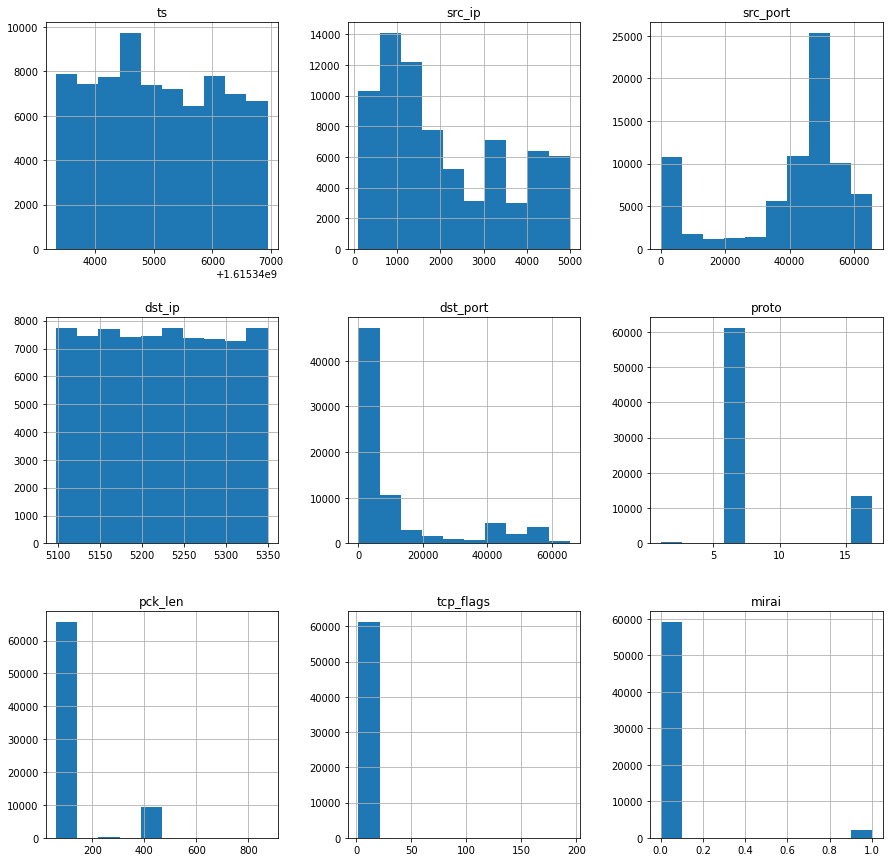

In [ ]:
# print histogram for each parameter
data.hist(figsize=(15,15))
plt.show() 

In [ ]:
#Let's drop mirai column
data=data.drop(['mirai'], axis = 1)

In [ ]:
print(data)

                 ts  src_ip  src_port  ...  proto  pck_len  tcp_flags
0      1.615343e+09     614   51573.0  ...      6       60        2.0
1      1.615343e+09     614   51573.0  ...      6       60        2.0
2      1.615343e+09    2915   41619.0  ...      6       60        2.0
3      1.615343e+09    1675   59731.0  ...      6       60        2.0
4      1.615343e+09    4665   34377.0  ...      6       60        2.0
...             ...     ...       ...  ...    ...      ...        ...
75192  1.615347e+09    1804   44345.0  ...      6       60        2.0
75193  1.615347e+09    3489   52426.0  ...      6       60        2.0
75194  1.615347e+09     632   54903.0  ...      6       60        2.0
75195  1.615347e+09     632   54903.0  ...      6       60        2.0
75196  1.615347e+09     614   51573.0  ...      6       60        2.0

[75197 rows x 8 columns]


In [ ]:
data.proto.unique()

array([ 6, 17,  1])

In [ ]:
# tcp
data_tcp = data.loc[(data['proto'] == 6)]
data_tcp=data_tcp.drop(['proto'], axis = 1)
data_tcp.to_csv("/content/drive/MyDrive/Colab Notebooks/Honeypot_analysis/data_split/data_tcp.csv", index=False)

# udp
data_udp = data.loc[(data['proto'] == 17)]
data_udp=data_udp.drop(['tcp_flags', 'proto'], axis = 1)
data_udp.to_csv("/content/drive/MyDrive/Colab Notebooks/Honeypot_analysis/data_split/data_udp.csv", index=False)

# icmp
data_icmp = data.loc[(data['proto'] == 1)]
data_icmp=data_icmp.drop(['src_port','dst_port','tcp_flags', 'proto'], axis = 1)
data_icmp.to_csv("/content/drive/MyDrive/Colab Notebooks/Honeypot_analysis/data_split/data_icmp.csv", index=False)

In [ ]:
data_tcp.isna().sum()

ts           0
src_ip       0
src_port     0
dst_ip       0
dst_port     0
pck_len      0
tcp_flags    0
dtype: int64

In [ ]:
data_udp.isna().sum()

ts          0
src_ip      0
src_port    0
dst_ip      0
dst_port    0
pck_len     0
dtype: int64

In [ ]:
data_icmp.isna().sum()

ts         0
src_ip     0
dst_ip     0
pck_len    0
dtype: int64

In [ ]:
#drop rows with NaN values 
#data_dropped_notNaN = data_dropped.dropna()
#print(data_dropped_notNaN.shape)